In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [48]:
df = pd.DataFrame()
df['X1']=[1,2,3,4,5,6,7,8,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [49]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

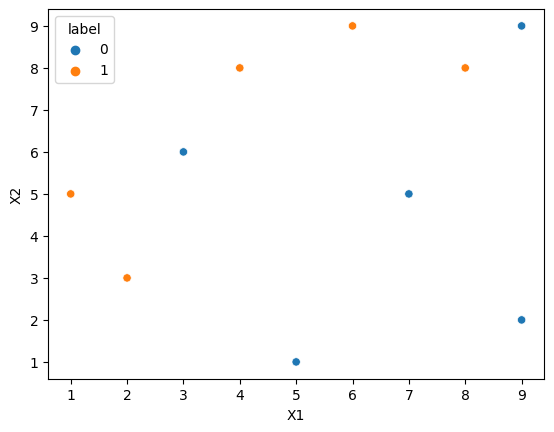

In [50]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [51]:
df.shape  

(10, 3)

In [52]:
df['weights']=1/df.shape[0]

In [53]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [56]:
df.iloc[:,:2].values

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [7, 5],
       [8, 8],
       [9, 9],
       [9, 2]])

In [57]:
x = df.iloc[:,:2].values
y = df.iloc[:,2].values

In [58]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

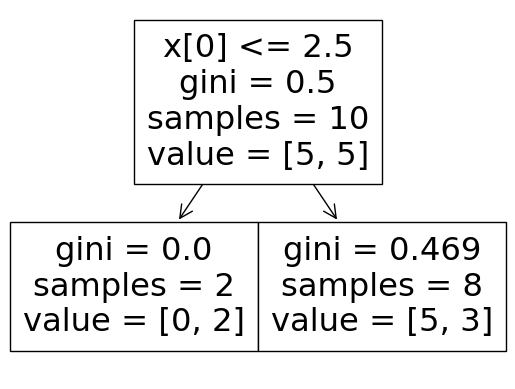

In [59]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [60]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

TypeError: ignored

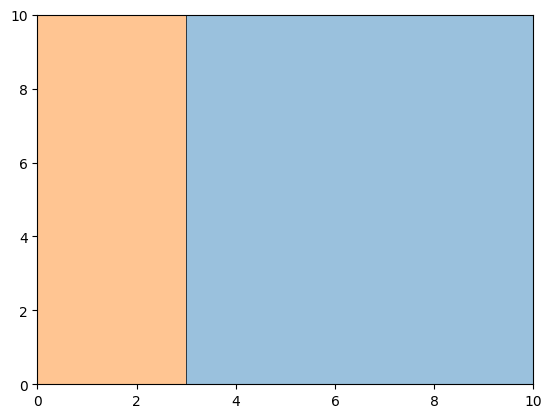

In [61]:
plot_decision_regions(x, y, clf=dt1, legend=2)

In [62]:
df['y_pred']= dt1.predict(x)

In [63]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,7,5,0,0.1,0
7,8,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [138]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error+0.00001))


In [66]:
# calculate model weight
alpha1=calculate_model_weight(0.3)# because three misclasified points are present
alpha1

0.42364893019360184

In [67]:
# step 4 - update weights
def update_row_weights(row,alpha=0.423):
  if row['label']==row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [68]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [69]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,7,5,0,0.1,0,0.065508
7,8,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [71]:
df['updated_weights'].sum()

0.9165153319682015

So we must ensure that sum of updated weights is equal to 1

In [72]:
df['noramlized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [73]:
df

,X1,X2,label,weights,y_pred,updated_weights,noramlized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,7,5,0,0.1,0,0.065508,0.071475
7,8,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [74]:
df['noramlized_weights'].sum()

1.0

In [75]:
np.cumsum(df['noramlized_weights'])
#df['lower_range'] = df['upper_range']

0    0.071475
1    0.142950
2    0.214425
3    0.380983
4    0.452458
5    0.619017
6    0.690492
7    0.857050
8    0.928525
9    1.000000
Name: noramlized_weights, dtype: float64

In [78]:
df['upper_range']=np.cumsum(df['noramlized_weights'])
df['lower_range']=df['upper_range']-df['noramlized_weights']

In [79]:
df

,X1,X2,label,weights,y_pred,updated_weights,noramlized_weights,upper_range,lower_range
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,7,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,8,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [82]:
df[['X1','X2','label','weights','y_pred','updated_weights','lower_range','upper_range']]

,X1,X2,label,weights,y_pred,updated_weights,lower_range,upper_range
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,7,5,0,0.1,0,0.065508,0.619017,0.690492
7,8,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [88]:
def create_new_dataset(df):

  indices =[]

  for i in range(df.shape[0]):
    a  = np.random.random()
    for index,row in df.iterrows():
      if row['upper_range']> a and a> row['lower_range']:
        indices.append(index)
  return indices

In [89]:
index_values = create_new_dataset(df)
index_values

[5, 5, 3, 0, 7, 7, 8, 6, 3, 7]

0.3827667967337165

In [118]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [91]:
second_df

,X1,X2,label,weights
5,6,9,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
7,8,8,1,0.1
7,8,8,1,0.1
8,9,9,0,0.1
6,7,5,0,0.1
3,4,8,1,0.1
7,8,8,1,0.1


In [96]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [97]:
x = second_df.iloc[:,:2].values
y = second_df.iloc[:,2].values

In [98]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

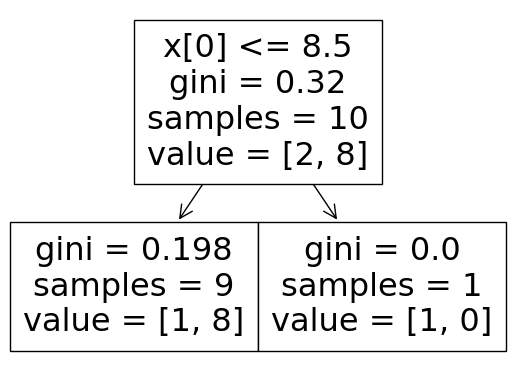

In [99]:
plot_tree(dt2)

TypeError: ignored

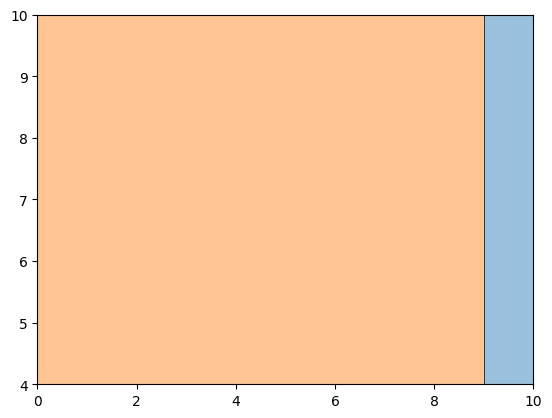

In [100]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [101]:
second_df['y_pred'] = dt2.predict(x)
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
7,8,8,1,0.1,1
7,8,8,1,0.1,1
8,9,9,0,0.1,0
6,7,5,0,0.1,1
3,4,8,1,0.1,1
7,8,8,1,0.1,1


In [102]:
alpha2 = calculate_model_weight(0.1)

In [103]:
alpha2

1.0986122886681098

In [107]:
 # step 4 - update weights
def update_row_weights(row,alpha=1.09):
  if row['label']==row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [110]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [111]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
7,8,8,1,0.1,1,0.033622
7,8,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
6,7,5,0,0.1,1,0.297427
3,4,8,1,0.1,1,0.033622
7,8,8,1,0.1,1,0.033622


In [112]:
second_df['noramlized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [113]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,noramlized_weights
5,6,9,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
7,8,8,1,0.1,1,0.033622,0.056034
7,8,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
6,7,5,0,0.1,1,0.297427,0.495694
3,4,8,1,0.1,1,0.033622,0.056034
7,8,8,1,0.1,1,0.033622,0.056034


In [114]:
second_df['upper_range']=np.cumsum(second_df['noramlized_weights'])
second_df['lower_range']=second_df['upper_range']-second_df['noramlized_weights']

In [115]:
second_df[['X1','X2','label','weights','y_pred','updated_weights','lower_range','upper_range']]

,X1,X2,label,weights,y_pred,updated_weights,lower_range,upper_range
5,6,9,1,0.1,1,0.033622,0.000000,0.056034
5,6,9,1,0.1,1,0.033622,0.056034,0.112068
3,4,8,1,0.1,1,0.033622,0.112068,0.168102
0,1,5,1,0.1,1,0.033622,0.168102,0.224136
7,8,8,1,0.1,1,0.033622,0.224136,0.280170
7,8,8,1,0.1,1,0.033622,0.280170,0.336204
8,9,9,0,0.1,0,0.033622,0.336204,0.392238
6,7,5,0,0.1,1,0.297427,0.392238,0.887932
3,4,8,1,0.1,1,0.033622,0.887932,0.943966
7,8,8,1,0.1,1,0.033622,0.943966,1.000000


In [116]:
def create_new_dataset(second_df):

  indices =[]

  for i in range(second_df.shape[0]):
    a  = np.random.random()
    for index,row in df.iterrows():
      if row['upper_range']> a and a> row['lower_range']:
        indices.append(index)
  return indices

In [130]:
index_values=create_new_dataset(second_df)
index_values

[7, 7, 9, 9, 5, 6, 6, 7, 7, 9]

In [131]:
third_df = df.iloc[index_values,[0,1,2,3]]

In [132]:
third_df

,X1,X2,label,weights
7,8,8,1,0.1
7,8,8,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
6,7,5,0,0.1
7,8,8,1,0.1
7,8,8,1,0.1
9,9,2,0,0.1


In [133]:
dt3 = DecisionTreeClassifier(max_depth=1)
x = third_df.iloc[:,:2]
y = third_df.iloc[:,2]

In [134]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [135]:
third_df['y_pred']=dt3.predict(x)

In [136]:
third_df

,X1,X2,label,weights,y_pred
7,8,8,1,0.1,1
7,8,8,1,0.1,1
9,9,2,0,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,1
6,7,5,0,0.1,0
6,7,5,0,0.1,0
7,8,8,1,0.1,1
7,8,8,1,0.1,1
9,9,2,0,0.1,0


In [139]:
alpha3 =calculate_model_weight(0)
alpha3

5.756462732485114

In [140]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 5.756462732485114


# Prediction
Now we are taking 7th column in df which has values of x1=1,x2=5

In [144]:
query1 = np.array([1,5]).reshape(1,2)

In [145]:
dt1.predict(query1)

array([1])

In [146]:
dt2.predict(query1)

array([1])

In [147]:
dt3.predict(query1)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [148]:
alpha1*1 + alpha2*(1) + alpha3*(-1)

-4.234201513623402

In [149]:
np.sign(-4.23)

-1.0

NOw we are taking 7th column in df which has values of x1=8,x2=8

In [151]:
query2 = np.array([8,8]).reshape(1,2)
dt1.predict(query2)


array([0])

In [152]:
dt2.predict(query2)

array([1])

In [153]:
dt3.predict(query2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [154]:
alpha1*(-1) + alpha2*(1) + alpha3*(1)

6.431426090959622

In [155]:
np.sign(6.4)

1.0